# Working with ATL08 Canopy data 

In [63]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.crs as crs
import cartopy.feature as cfeature
import h5py  
from astropy.time import Time
import os

In [64]:
# reads H5 file and reads through file to store data - might need to change data to be on github not my own computer?
f = h5py.File('C:\\Users\\samgr\\OneDrive\\Desktop\\masters_year\\Masters_Project\\Preparation\\ICESat2_Data\\177219966\\ATL08_20181014141223_02440101_003_01.h5', 'r')
mean_canopy = f['/gt1r/land_segments/canopy/h_mean_canopy'][:]
min_canopy = f['/gt1r/land_segments/canopy/h_min_canopy'][:]
max_canopy = f['/gt1r/land_segments/canopy/h_max_canopy'][:]
toc_roughness = f['/gt1r/land_segments/canopy/toc_roughness'][:]
canopy_openness = f['/gt1r/land_segments/canopy/canopy_openness'][:]

latitude = f['/gt1r/land_segments/latitude'] [:]
longitude = f['/gt1r/land_segments/longitude'][:]
dt = f['/gt1r/land_segments/delta_time'][:]
segment_id_beg = f['/gt1r/land_segments/segment_id_beg'][:]
segment_id_end = f['/gt1r/land_segments/segment_id_end'][:]
canopy_rh_conf =f['/gt1r/land_segments/canopy/canopy_rh_conf'][:]
ph_segment_id =f['/gt1r/signal_photons/ph_segment_id'][:]
terrain_best_fit = f['gt1r/land_segments/terrain/h_te_best_fit'][:]
classed_pc_flag = f['gt1r/signal_photons/classed_pc_flag'][:]
delta_time = f['gt1r/signal_photons/delta_time'][:]

In [65]:
# create pandas dataframe with the columns thought to be useful
# At the end of dataframe, the values of 3.402823e+38 - these are times when the photon did not give a good signal I think?
df08=pd.DataFrame({'latitude':latitude,'longitude':longitude,'delta time':dt,'Segment_id_beg':segment_id_beg,
                   'segment_id_end':segment_id_end,'mean_canopy': mean_canopy,'canopy_rh_conf':canopy_rh_conf, 
                   'canopy_openness':canopy_openness, 'min_canopy':min_canopy, 'max_canopy': max_canopy, 
                   'toc_roughness':toc_roughness, 'terrain_best_fit': terrain_best_fit})

# Columns that could be useful that requires calculations from other columns
df08["mean_segment_id"] = df08["segment_id_end"] - df08["Segment_id_beg"]
df08["CV"] = df08["canopy_openness"] / df08["mean_canopy"]
df08["sd_ratio"] = df08["toc_roughness"] / df08["canopy_openness"]
df08["canopy_relief"] = (df08["mean_canopy"] - df08["min_canopy"]) / (df08["max_canopy"] - df08["min_canopy"])

df08

,latitude,longitude,delta time,Segment_id_beg,segment_id_end,mean_canopy,canopy_rh_conf,canopy_openness,min_canopy,max_canopy,toc_roughness,terrain_best_fit,mean_segment_id,CV,sd_ratio,canopy_relief
0,0.000579,20.375406,2.476154e+07,1,5,1.290175e+01,1,6.285161e+00,9.770813e-01,2.740494e+01,5.744942e+00,323.469025,4,0.487156,0.914048,0.451216
1,0.001472,20.375317,2.476154e+07,6,10,1.045795e+01,2,7.883380e+00,7.256165e-01,2.932574e+01,1.938382e+00,310.911316,4,0.753817,0.245882,0.340290
2,0.002374,20.375229,2.476154e+07,11,15,1.512998e+01,1,8.756711e+00,5.876465e-01,3.073804e+01,1.482360e+00,311.236938,4,0.578766,0.169283,0.482327
3,0.003276,20.375141,2.476154e+07,16,20,1.444446e+01,2,7.367977e+00,7.568054e-01,2.851227e+01,1.881915e+00,310.966431,4,0.510090,0.255418,0.493152
4,0.004178,20.375050,2.476154e+07,21,25,1.343893e+01,2,7.095978e+00,7.490234e-01,2.765768e+01,1.464491e+00,311.100677,4,0.528017,0.206383,0.471592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20615,26.995687,17.592564,2.476197e+07,149677,149681,3.402823e+38,0,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,765.267883,4,1.000000,1.000000,NaN
20616,26.996588,17.592468,2.476197e+07,149682,149686,3.402823e+38,0,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,767.160461,4,1.000000,1.000000,NaN
20617,26.997490,17.592373,2.476197e+07,149687,149691,3.402823e+38,0,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,767.401733,4,1.000000,1.000000,NaN
20618,26.998390,17.592272,2.476197e+07,149692,149696,3.402823e+38,0,3.402823e+38,3.402823e+38,3.402823e+38,3.402823e+38,770.438416,4,1.000000,1.000000,NaN


In [66]:
df08.latitude.iloc[:20]

0     0.000579
1     0.001472
2     0.002374
3     0.003276
4     0.004178
5     0.005080
6     0.005982
7     0.006884
8     0.007786
9     0.008689
10    0.009591
11    0.010494
12    0.011395
13    0.012297
14    0.014101
15    0.015002
16    0.015906
17    0.016807
18    0.017708
19    0.018611
Name: latitude, dtype: float32

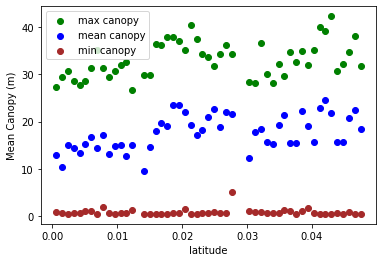

In [67]:
plt.scatter(latitude[0:50], max_canopy[0:50], color = "green", label = "max canopy" )
plt.scatter(latitude[0:50], mean_canopy[0:50], color = "blue", label = "mean canopy")
plt.scatter(latitude[0:50], min_canopy[0:50], color = "brown", label = "min canopy")
#plt.scatter(latitude[0:50], terrain_best_fit[0:50])
yxais = "Mean Canopy (m)"
plt.xlabel("latitude")
plt.legend(loc = 'best')
plt.ylabel("Mean Canopy (m)")
plt.show()
            

** Latitude of the center-most signal photon within each segment - description - still not each photon **

** Obviously isn't the way you do it :(((   **

In [68]:
pcdf = pd.DataFrame({'classed_pc_flag':classed_pc_flag, 'ph_segment_id':ph_segment_id, 'delta_time':delta_time})

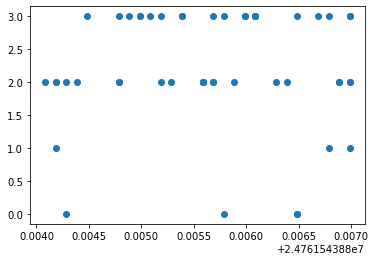

In [71]:
plt.scatter(delta_time[:50], classed_pc_flag[:50])
plt.show()